## Bayes' Theorem, Disease Example, and Toy Epidemic Simulation

### Conditional Probability

Conditional probability is the measure of the probability of an event occuring given that another event has already occured.

$$P(A|B)=\frac{P(A \cap B)}{P(B)}$$

For example, the conditional probability of event A given the sample space S is equal to the probability of A.

$$P(A|S)=\frac{P(A \cap S)}{P(S)}=\frac{P(A)}{P(S)}=P(A)$$

In addition; two subsets, A and B, are said to be independent if $P(A|B)=P(A)$ and $P(B|A)=P(B)$.

### Bayes' Theorem and Law of Total Probability

If we combine the equations of $P(A|B)$ and $P(B|A)$, we obtain the Bayes' Theorem.

$$P(A|B)=\frac{P(B|A)P(A)}{P(B)}$$

We can use law of total probability to express $P(B)$ via several distinct events.

$$P(B)=\sum_{i=1}^n P(B|A_{i})P(A_{i})$$

If we combine those 2 equations, we get

$$P(A|B)=\frac{P(B|A)P(A)}{\sum_{i=1}^n P(B|A_{i})P(A_{i})}.$$

Bayes' theorem is important because it provides a systematic way to update the probability of a hypothesis based on new evidence.

### Disease Example

#### Effect of Number of Tests

Assume that there is an epidemic disease. We will calculate the probability of a person to have the disease given the test result is positive (for both one positive test and two successive positive tests) using the sensitivity of the test and a-priori probability.

Given: \
• probability for a test to be positive is 0.98 for an infected person, meaning $P(+|I)=0.98$ and $P(-|I)=0.02$ \
• probability for a test to be positive is 0.03 for a healthy person, meaning $P(+|H)=0.03$ and $P(-|H)=0.97$ \
• average a-priori probability to be infected is 0.01 (hypothesis), meaning $P(I)=0.01$ and $P(H)=0.99$

The probability of being infected given one positive tests:

$$P(I|+)=\frac{P(+|I)P(I)}{\sum P(+|I_{i})P(I_{i})}=\frac{P(+|I)P(I)}{P(+|I)P(I)+P(+|H)P(H)}=\frac{(0.98)(0.01)}{(0.98)(0.01)+(0.03)(0.99)}=0.2481=24.81\%$$

For two successive positive tests: \
• new a-priori probability to be infected is 0.2481, meaning $P(I)=0.2481$ and $P(H)=0.7519$

The probability of being infected given two successive positive tests:

$$P(I|+)=\frac{P(+|I)P(I)}{\sum P(+|I_{i})P(I_{i})}=\frac{P(+|I)P(I)}{P(+|I)P(I)+P(+|H)P(H)}=\frac{(0.98)(0.2481)}{(0.98)(0.2481)+(0.03)(0.7519)}=0.9151=91.51\%$$

#### Effect of A-priori Probability (Hypothesis)

Now, we will show how the probability of being infected changes depending on the a-priori probability.

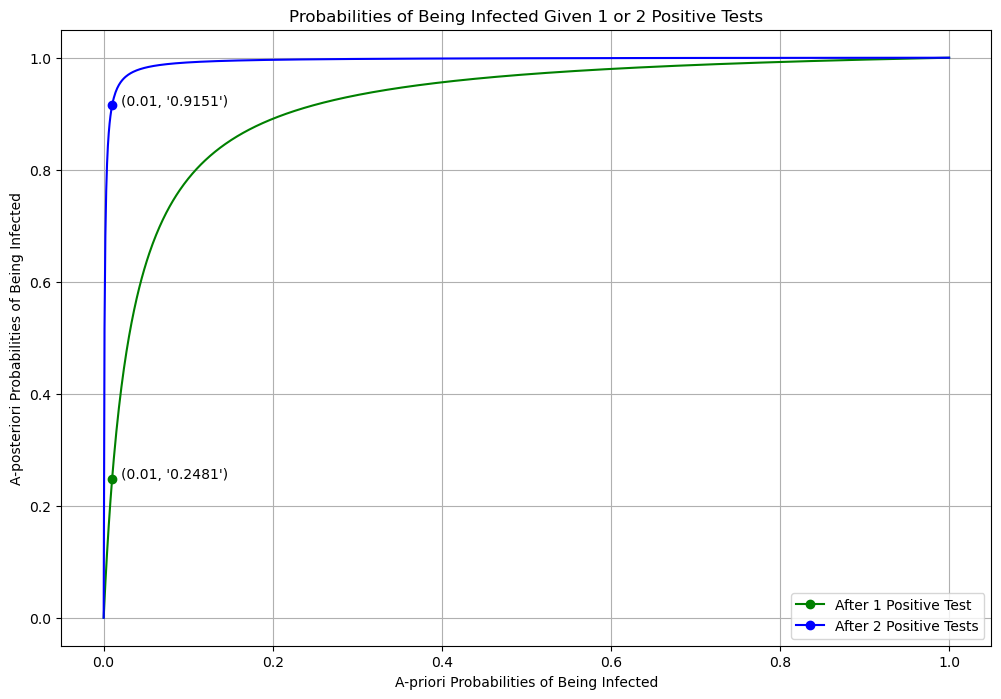

In [1]:
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# given
pP_givenI = 0.98              # probability of positive test given the person is infected
pP_givenH = 0.03              # probability of positive test given the person is healthy
pI = np.linspace(0, 1, 1001)  # space of a-priori probabilities from 0 to 1 with the stepsize of 0.001

# first test
pP = pP_givenI * pI + pP_givenH * (1-pI)  # prababilities for one positive test
pI_givenP = pP_givenI * pI / pP           # probabilities for the person to be infected given one positive test

# second test
pPP = pP_givenI * pI_givenP + pP_givenH * (1-pI_givenP)  # prababilities for two consecutive positive tests
pI_givenPP = pP_givenI * pI_givenP / pPP                 # probabilities for the person to be infected given two successive positive tests

# plot the result
plt.figure(figsize=(12, 8), facecolor='white')
plt.plot(pI, pI_givenP, "-go", markevery=[10], label="After 1 Positive Test")
plt.plot(pI, pI_givenPP, "-bo", markevery=[10], label="After 2 Positive Tests")
plt.title("Probabilities of Being Infected Given 1 or 2 Positive Tests")
plt.xlabel("A-priori Probabilities of Being Infected")
plt.ylabel("A-posteriori Probabilities of Being Infected")
plt.annotate((pI[10], "{:.4f}".format(pI_givenP[10])), xy=(pI[10]+0.01,pI_givenP[10]))
plt.annotate((pI[10], "{:.4f}".format(pI_givenPP[10])), xy=(pI[10]+0.01,pI_givenPP[10]))
plt.legend()
plt.grid(True)
plt.show()

References

[1] Dominic Hirschbühl, Advanced Data Analysis Lecture Notes \
[2] Glen Cowan, Statistical Data Analysis, Oxford University Press